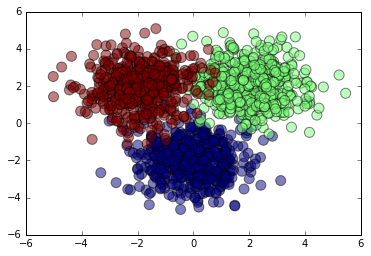

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Nclass = 500

# Generate some gaussian clouds
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5);

In [2]:
D = 2 # number of dimensions
M = 3 # number of hidden layers
K = 3 # number of classes

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y

def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return n_correct / n_total

P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1)

class_rate = classification_rate(Y, P)
print("Classification rate for randomly chosen weights:", class_rate)

Classification rate for randomly chosen weights: 0.3333333333333333


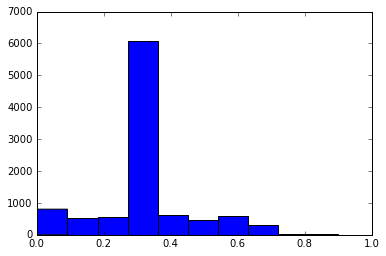

In [3]:
def compute_class_rate(num_iter, X, Y):
    class_rates = []
    for i in range(num_iter):
        W1 = np.random.randn(D, M)
        b1 = np.random.randn(M)
        W2 = np.random.randn(M, K)
        b2 = np.random.randn(K)

        P_Y_given_X = forward(X, W1, b1, W2, b2)
        P = np.argmax(P_Y_given_X, axis=1)

        class_rates.append(classification_rate(Y, P))
    return class_rates

num_iter = 10000
class_rates = compute_class_rate(num_iter, X, Y)
plt.hist(class_rates);